In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-09-05-18_09_40/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

63001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
slice = 50_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

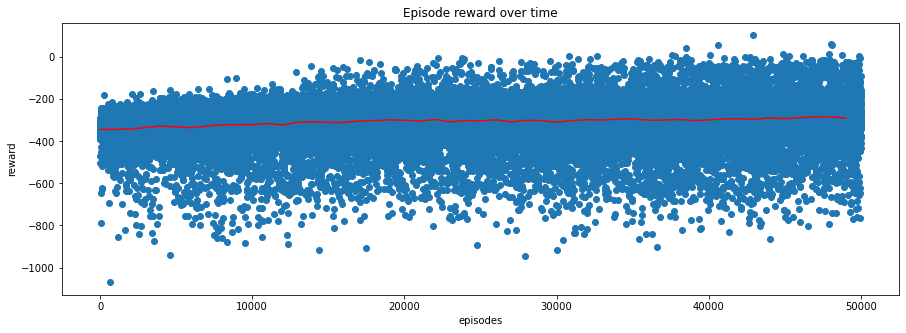

Maximum: 104.0
Average: -306.55131199998607
Moving Average (simple): {0: -343.5698301698302, 1000: -343.2523476523477, 2000: -341.4075924075924, 3000: -333.97102897102894, 4000: -327.15244755244754, 5000: -331.3666333666334, 6000: -334.77202797202796, 7000: -327.6061938061938, 8000: -321.37382617382616, 9000: -321.0941058941059, 10000: -320.55204795204793, 11000: -315.36683316683315, 12000: -321.9192807192807, 13000: -309.1414585414585, 14000: -306.63856143856145, 15000: -309.820979020979, 16000: -310.6027972027972, 17000: -302.96143856143857, 18000: -301.93226773226775, 19000: -297.85074925074923, 20000: -299.4207792207792, 21000: -303.3602397602398, 22000: -296.1326673326673, 23000: -307.42357642357643, 24000: -301.1280719280719, 25000: -302.7254745254745, 26000: -297.412987012987, 27000: -307.618981018981, 28000: -300.13586413586415, 29000: -301.4623376623377, 30000: -308.6835164835165, 31000: -301.63016983016985, 32000: -296.54445554445556, 33000: -298.96863136863135, 34000: -293.9

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

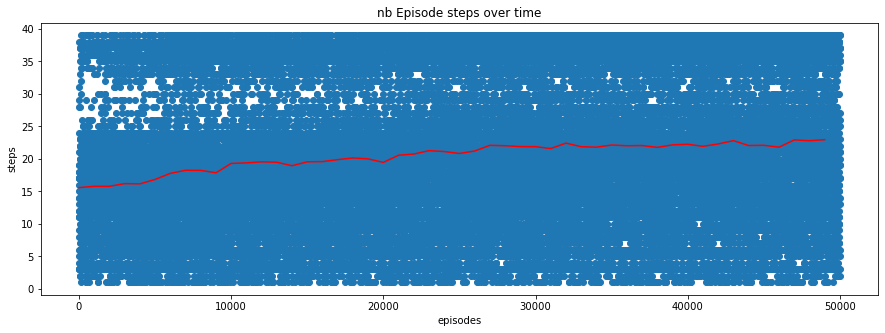

Maximum: 39
Average: 20.3846
Moving Average (simple): {0: 15.586413586413586, 1000: 15.782217782217781, 2000: 15.782217782217781, 3000: 16.2017982017982, 4000: 16.163836163836162, 5000: 16.83916083916084, 6000: 17.778221778221777, 7000: 18.248751248751248, 8000: 18.235764235764236, 9000: 17.86813186813187, 10000: 19.307692307692307, 11000: 19.383616383616385, 12000: 19.54945054945055, 13000: 19.482517482517483, 14000: 18.952047952047952, 15000: 19.552447552447553, 16000: 19.584415584415584, 17000: 19.88911088911089, 18000: 20.151848151848153, 19000: 20.002997002997002, 20000: 19.462537462537462, 21000: 20.566433566433567, 22000: 20.748251748251747, 23000: 21.26873126873127, 24000: 21.12887112887113, 25000: 20.837162837162836, 26000: 21.215784215784215, 27000: 22.08891108891109, 28000: 22.024975024975024, 29000: 21.89210789210789, 30000: 21.878121878121878, 31000: 21.595404595404595, 32000: 22.42957042957043, 33000: 21.872127872127873, 34000: 21.806193806193807, 35000: 22.13186813186813

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
# plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")